<a href="https://colab.research.google.com/github/khan441shahrukh/EDA-Telecom-Churn-Analysis/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

# Mount drive and Import CSV file

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Almabetter/Python/Capstone Project 1/Telecom Churn.csv')

# Data Analysis

In [4]:
df.info() #basic info of the csv file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [5]:
df.head(4)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False


In [6]:
df.shape

(3333, 20)

In [7]:
df.isnull().sum() # to get no of null values in each column

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [8]:
df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [9]:
print(df.columns.tolist())

['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']


In [10]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())


Rows     :  3333
Columns  :  20

Features : 
 ['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']

Missing values :   0


1.2 Variable Breakdown
 

1. State - 51 Unique States in United States of America

2. Account Length - Length of The Account

3. Area Code - 415 relates to San Francisco,408 is of San Jose and 510 is of City of Okland

4. International Plan - Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan

5. Voice Mail Plan - Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan

6. Number vmail messages - Number of Voice Mail Messages ranging from 0 to 50

7. Total day minutes - Total Number of Minutes Spent By Customers in Morning

8. Total day calls - Total Number of Calls made by Customer in Morning.

9. Total day charge - Total Charge to the Customers in Morning.

10. Total eve minutes - Total Number of Minutes Spent By Customers in Evening

11. Total eve calls - Total Number of Calls made by Customer in Evening.

12. Total eve charge - Total Charge to the Customers in Morning.

13. Total night minutes - Total Number of Minutes Spent By Customers in the Night.

14. Total night calls - Total Number of Calls made by Customer in Night.

15. Total night charge - Total Charge to the Customers in Night.

In [11]:
#Separating churn and non churn customers
churn     = df[df["Churn"] == bool(True)]
not_churn = df[df["Churn"] == bool(False)]

In [12]:

print ("No of churn customer     : " ,churn.shape[0])
print ("No of non-churn customer     : " ,not_churn.shape[0])

No of churn customer     :  483
No of non-churn customer     :  2850


In [13]:
churn.shape

(483, 20)

In [14]:
#Area Code
df['Area code'].unique()

array([415, 408, 510])

# Churn because of customer care calls.

In [22]:
not_churn['Customer service calls'].unique()

array([1, 0, 2, 3, 4, 5, 7, 6, 8])

In [23]:
max(list(not_churn['Customer service calls'].unique())) # This is max n of customer care call to non-churn customer

8

In [24]:
churn['Customer service calls'].unique() ## This is max n of customer care call to churn customer

array([4, 5, 1, 0, 3, 2, 7, 9, 6, 8])

In [25]:
max(list(churn['Customer service calls'].unique()))

9

We can see from above anaysis that no of Calls to Churn Customer is high as compared to Non Churn Customer.

Recommendation -
1. Customers should not be called more than 7 times.






# Voice Mail Message Anaysis



In [26]:
#Replacing Yes/No values with 1 and 0
# df['International plan'] = df['International plan'].replace({"Yes":1,"No":0}).astype(int)
# df['Voice mail plan'] = df['Voice mail plan'].replace({"Yes":1,"No":0}).astype(int)

In [27]:
#Voice-Mail Feautre Messages
print('Unique vmail messages',df['Number vmail messages'].unique())
df['Number vmail messages'].describe()

Unique vmail messages [25 26  0 24 37 27 33 39 30 41 28 34 46 29 35 21 32 42 36 22 23 43 31 38
 40 48 18 17 45 16 20 14 19 51 15 11 12 47  8 44 49  4 10 13 50  9]


count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: Number vmail messages, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


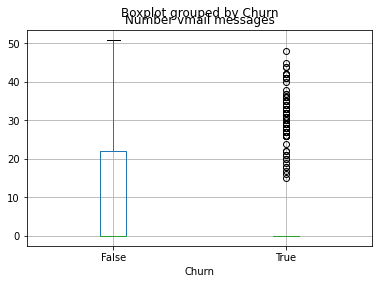

In [28]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


plt.show()
df.boxplot(column='Number vmail messages', by='Churn')

We can Notice for Voice-Mail Feature when there are more than 20 voice-mail messages then certainly there is a churn indicating improving the voice-mail feature or setting a limit and check whether a customer is retianed.

Recommendations :
1. Voice-Mail Service Upgradation 
2. Setting up a limit on Voice-Mail service strictly no more than 25 voice mails. 
3. Quality Drop in Voice-Mail after 25 voice mails.

# Day Time Anaysis

**Total-Minutes in Day Affecting the Churn**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


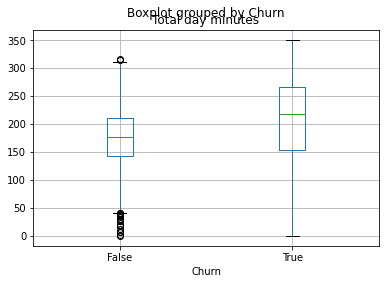

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


plt.show()
df.boxplot(column='Total day minutes', by='Churn')

We can infer from above box-plot that with users spending more 220 minutes or more i.e. approx 4hrs tend to switch to other operator.

Solution - following would be the factors that should be implemented:

1. Network Disturbance during a Call
2. Cracking sound or noise during a call
3. Need to Upgrade or make smarter use of technologies like VoLTE to improve Voice Quality.
4. Network Upgradation

**Total no of calls in day affecting churn**

In [ ]:
print('Maximum number of calls:',df['Total day calls'].max())
print('Minimum number of calls:',df['Total day calls'].min())
print('Average number of calls:',df['Total day calls'].mean())

Maximum number of calls: 165
Minimum number of calls: 0
Average number of calls: 100.43564356435644


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


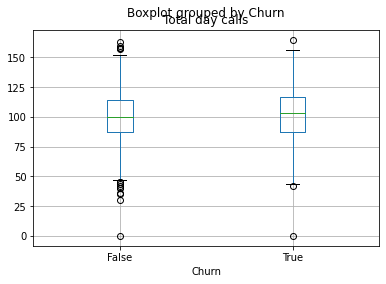

In [ ]:
plt.show()
df.boxplot(column='Total day calls', by='Churn')

We can infer here that on an average a 100 calls are made which is a good indication for the company.But we can also note that for the churn customer the median is slightly higher than 100 which indicates there are call drops which may lead to more calls in a morning

**Day charges affecting the churn rate.**

In [ ]:
print('Maximum number of charge:',df['Total day charge'].max())
print('Minimum number of charge:',df['Total day charge'].min())
print('Average number of charge:',df['Total day charge'].mean())

Maximum number of charge: 59.64
Minimum number of charge: 0.0
Average number of charge: 30.562307230723093


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


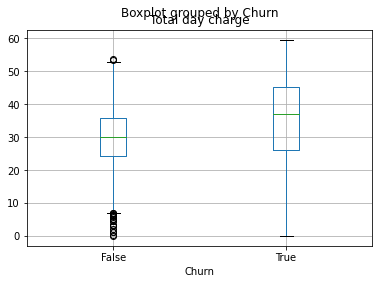

In [ ]:
plt.show()
df.boxplot(column='Total day charge', by='Churn') #people who pay more day charges leave the company

Well,Here we can clearly indicate a strategy a good strategy to be implemented. As from above infered box-plots we can conclude one thing i.e Customers having more minutes spent on the network tend to leave the it's subscription and from the above box-plot it clearly indicates that there is defect in the pricing startegy of the company.

Solution -

1. Startegy of pricing needs to be re-evaluated.
2. The Clients who have high call minutes and calls need a discount in the end

# Evening time Analysis

**Total-Minutes in Evening Affecting the Churn**

In [ ]:
print('Maximum number of minutes:',df['Total eve minutes'].max(),'i.e. Max number of Hours  spent:',round(df['Total eve minutes'].max()/60))
print('Maximum number of minutes:',df['Total eve minutes'].min())
print('Average number of minutes:',df['Total eve minutes'].mean())

Maximum number of minutes: 363.7 i.e. Max number of Hours  spent: 6
Maximum number of minutes: 0.0
Average number of minutes: 200.98034803480346


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


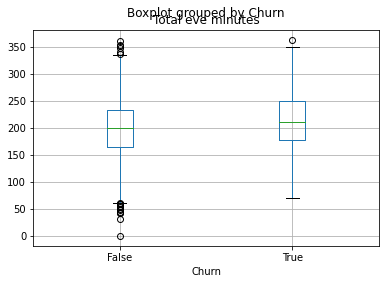

In [ ]:
plt.show()
df.boxplot(column='Total eve minutes', by='Churn')

**No of calls in evening affecting churn**

In [ ]:
print('Maximum number of calls:',df['Total eve calls'].max())
print('Minimum number of calls:',df['Total eve calls'].min())
print('Average number of calls:',df['Total eve calls'].mean())

Maximum number of calls: 170
Minimum number of calls: 0
Average number of calls: 100.11431143114311


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


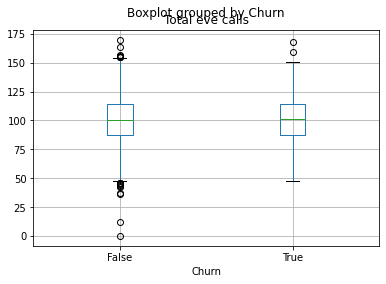

In [ ]:
plt.show()
df.boxplot(column='Total eve calls', by='Churn')

**Evening charges affecting the churn rate.**

In [ ]:
print('Maximum number of charge:',df['Total eve charge'].max())
print('Minimum number of charge:',df['Total eve charge'].min())
print('Average number of charge:',df['Total eve charge'].mean())

Maximum number of charge: 30.91
Minimum number of charge: 0.0
Average number of charge: 17.083540354035392


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


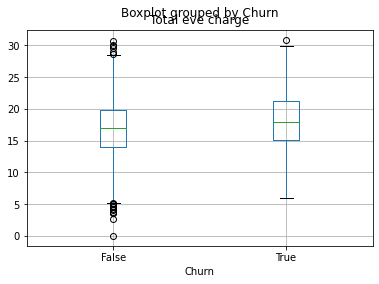

In [ ]:
plt.show()
df.boxplot(column='Total eve charge', by='Churn')

# Night Time Analysis

**Total-Minutes in Night Affecting the Churn**

In [ ]:
print('Maximum number of minutes:',df['Total night minutes'].max(),'i.e. Max number of Hours  spent:',round(df['Total night minutes'].max()/60))
print('Minimum number of minutes:',df['Total night minutes'].min())
print('Average number of minutes:',df['Total night minutes'].mean())

Maximum number of minutes: 395.0 i.e. Max number of Hours  spent: 7
Minimum number of minutes: 23.2
Average number of minutes: 200.87203720372048


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


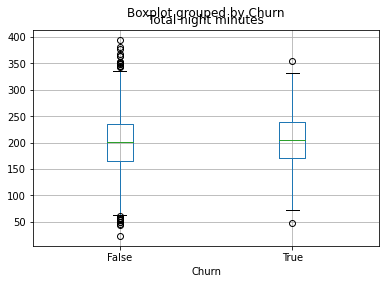

In [ ]:
plt.show()
df.boxplot(column='Total night minutes', by='Churn')

**Total no of calls in night affecting the churn**

In [ ]:
print('Maximum number of calls:',df['Total night calls'].max())
print('Minimum number of calls:',df['Total night calls'].min())
print('Average number of calls:',df['Total night calls'].mean())

Maximum number of calls: 175
Minimum number of calls: 33
Average number of calls: 100.10771077107711


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


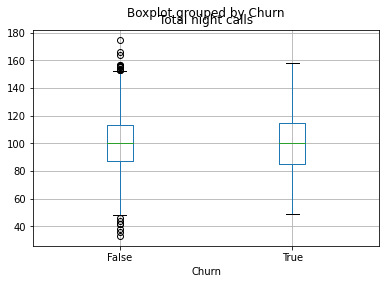

In [ ]:
plt.show()
df.boxplot(column='Total night calls', by='Churn')

**Total Night charges affecting the churn rate.**

In [ ]:
print('Maximum number of charge:',df['Total night charge'].max())
print('Minimum number of charge:',df['Total night charge'].min())
print('Average number of charge:',df['Total night charge'].mean())

Maximum number of charge: 17.77
Minimum number of charge: 1.04
Average number of charge: 9.039324932493264


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


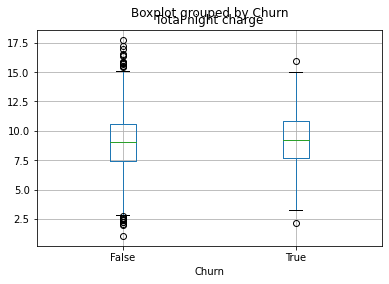

In [ ]:
plt.show()
df.boxplot(column='Total night charge', by='Churn')

# International Calls Analysis

**Total-Minutes in International calls affecting the Churn**

In [ ]:
print('Maximum number of minutes:',df['Total intl minutes'].max(),'i.e. Max number of Hours  spent:',round(df['Total intl minutes'].max()/60))
print('Minimum number of minutes:',df['Total intl minutes'].min())
print('Average number of minutes:',df['Total intl minutes'].mean())

Maximum number of minutes: 20.0 i.e. Max number of Hours  spent: 0
Minimum number of minutes: 0.0
Average number of minutes: 10.237293729372933


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


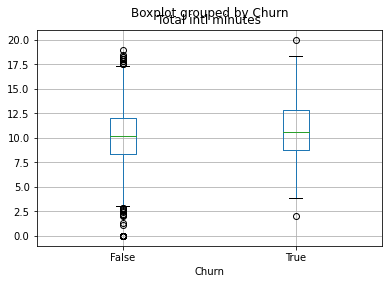

In [ ]:
plt.show()
df.boxplot(column='Total intl minutes', by='Churn')

**Total no of international calls affecting the churn**

In [ ]:
print('Maximum number of calls:',df['Total intl calls'].max())
print('Minimum number of calls:',df['Total intl calls'].min())
print('Average number of calls:',df['Total intl calls'].mean())

Maximum number of calls: 20
Minimum number of calls: 0
Average number of calls: 4.4794479447944795


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


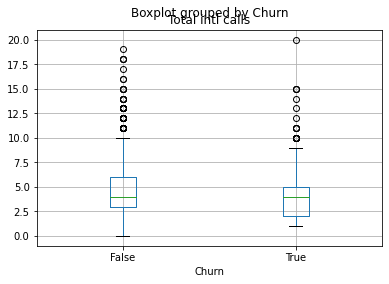

In [ ]:
plt.show()
df.boxplot(column='Total intl calls', by='Churn')

**International charges affecting the churn**

In [ ]:
print('Maximum number of charge:',df['Total intl charge'].max())
print('Minimum number of charge:',df['Total intl charge'].min())
print('Average number of charge:',df['Total intl charge'].mean())

Maximum number of charge: 5.4
Minimum number of charge: 0.0
Average number of charge: 2.764581458145804


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


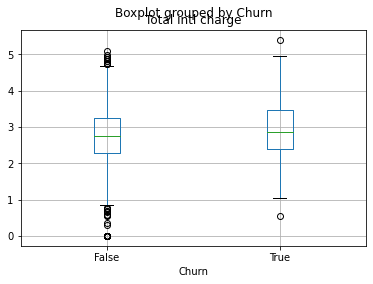

In [ ]:
plt.show()
df.boxplot(column='Total intl charge', by='Churn')

# Churn According to States

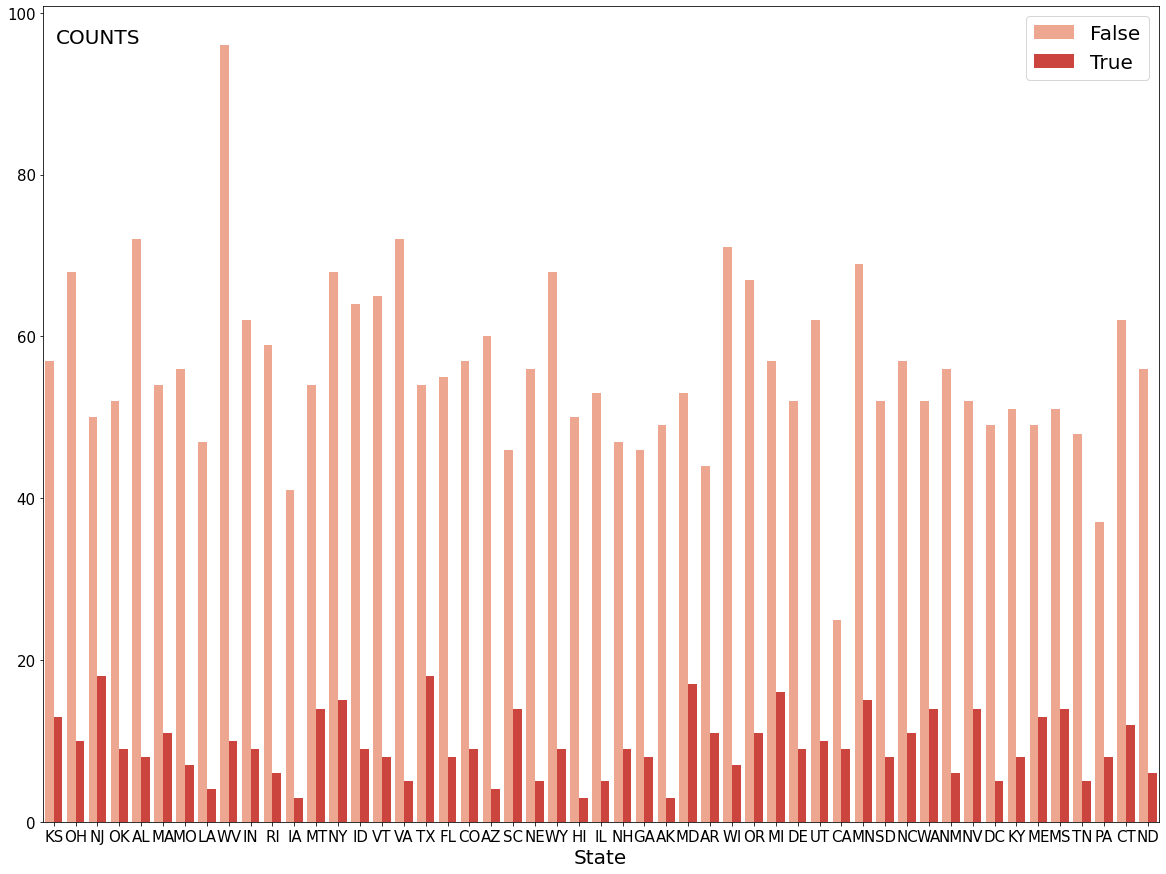

In [ ]:
# By Age
import seaborn as sns
fig, axz = plt.subplots(figsize=(20,15))

axz = sns.countplot(x='State', hue='Churn', data=df, palette='Reds')


axz.set_ylabel('COUNTS', rotation=0, labelpad=100,size=20)
axz.set_xlabel('State', size=20)
axz.yaxis.set_label_coords(0.05, 0.95)  # (x, y)
axz.legend(loc=0,fontsize=20);

axz.tick_params(labelsize=15)  # Changes size of the values on the label


We can clearly see that NJ, TX, MD have the bit more churn rate than usual, A Network Upgradation would be strongly suggested in these areas

# Churn because of Customer Service

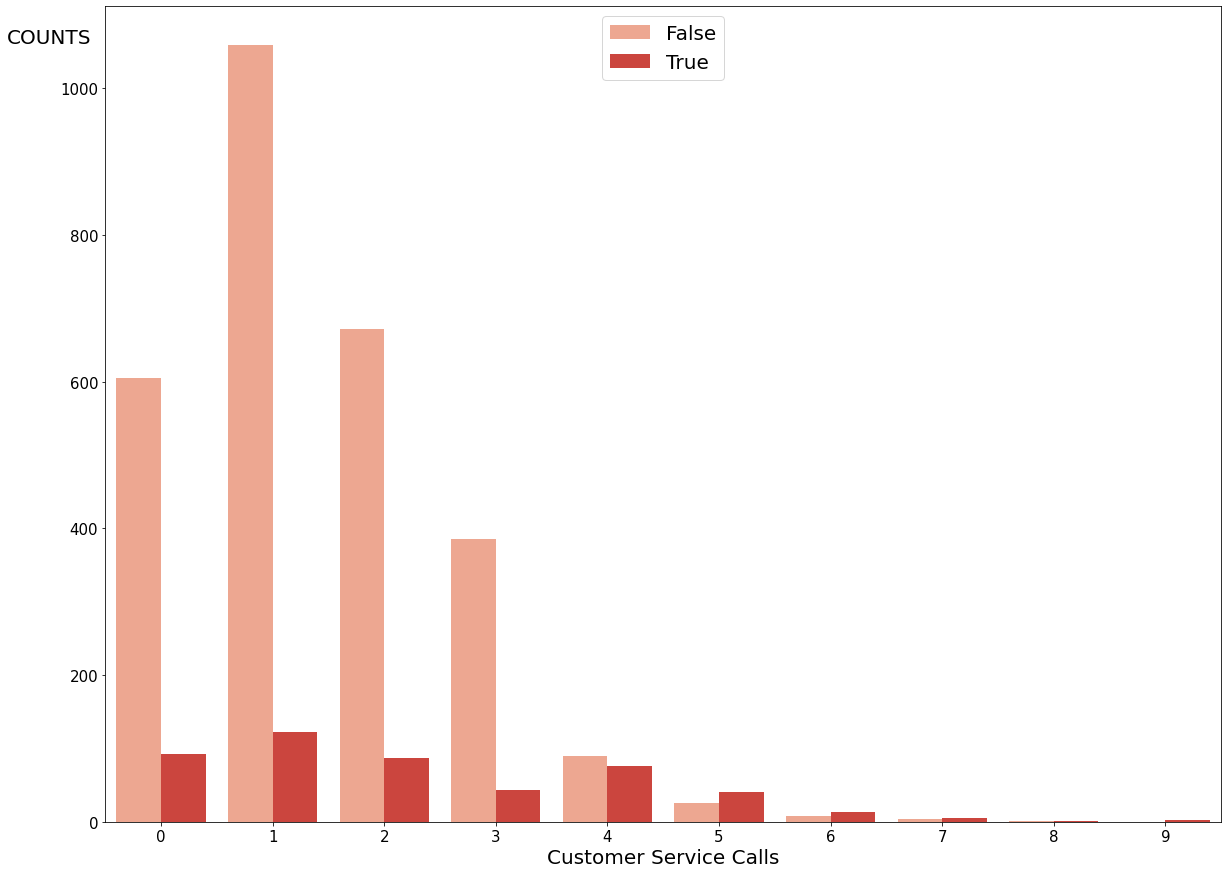

In [ ]:
# Customer Calls
fig, axz = plt.subplots(figsize=(20,15))

axz = sns.countplot(x='Customer service calls', hue='Churn', data=df, palette='Reds')


axz.set_ylabel('COUNTS', rotation=0, labelpad=100,size=20)
axz.set_xlabel('Customer Service Calls', size=20)
axz.yaxis.set_label_coords(-0.05, 0.95)  # (x, y)
axz.legend(loc=0,fontsize=20);

axz.tick_params(labelsize=15)  # Changes size of the values on the label



While some consumers are lazy and have switched to another network operator without resolving their issue, customers who have just contacted once have a high churn rate, indicating that their issue was not resolved on the first attempt. Some clients' problems remained unsolved even after multiple calls.

1. In such circumstances, feedback is required.

2. It should provide the customer assurance that their problem will be resolved in the first attempt.